In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [18]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [19]:
# load model
model = tf.keras.models.load_model('object_detection.h5')
print('model loaded sucessfully')

model loaded sucessfully


In [20]:
path = 'images/Cars0.png'
image = load_img(path) # PIL object
image = np.array(image, dtype=np.uint8) # 8 bit array (0, 255)
image1 = load_img(path, target_size=(224,224))
image_arr_224 = img_to_array(image1)/255.0 # convert into array and get normalized output


In [21]:
# size of the original image
h,w,d = image.shape
print('Height of the image:',h)
print('Width of the image:',w)

Height of the image: 268
Width of the image: 500


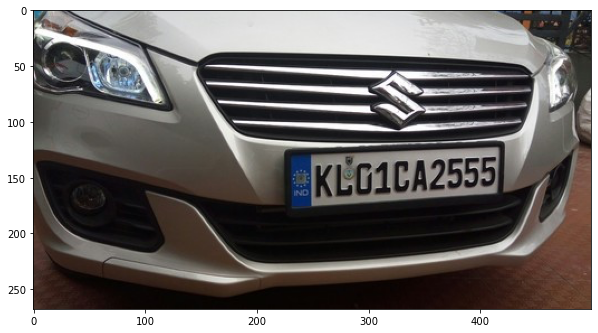

In [22]:
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [23]:
test_arr = image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [24]:
# make predictions
coords = model.predict(test_arr)
coords

1/1 [==============================] - 2s 2s/step


array([[0.48879972, 0.8281085 , 0.44461277, 0.666437  ]], dtype=float32)

In [25]:
# denormalize the values
denorm = np.array([w,w,h,h])
coords = coords * denorm
coords

array([[244.3998605 , 414.05424476, 119.1562227 , 178.60510802]])

In [26]:
coords = coords.astype(np.int32)
coords

array([[244, 414, 119, 178]])

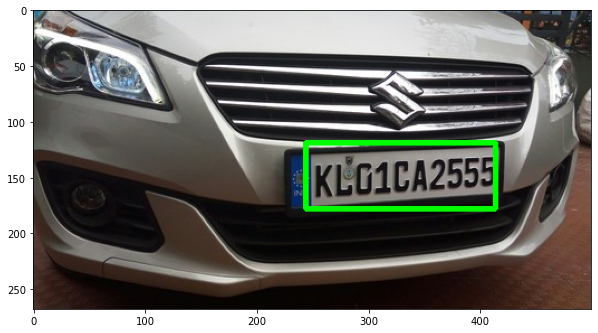

In [27]:
# draw bounding box on top of the image
xmin,xmax,ymin,ymax = coords[0]
pt1 = (xmin,ymin)
pt2 = (xmax,ymax)
pt1,pt2
cv2.rectangle(image, pt1, pt2, (0,255,0), 3)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [28]:
# create pipeline
# path = 'images/Cars0.png'
def object_detection(path):
    # read image
    image = load_img(path) # PIL object
    image = np.array(image, dtype=np.uint8) # 8 bit array (0, 255)
    image1 = load_img(path, target_size=(224,224))
    # data preprocessing
    image_arr_224 = img_to_array(image1)/255.0 # convert into array and get normalized output
    h,w,d = image.shape
    test_arr = image_arr_224.reshape(1,224,224,3)
    # make predictions
    coords = model.predict(test_arr)
    # denormalize the values
    denorm = np.array([w,w,h,h])
    coords = coords * denorm
    coords = coords.astype(np.int32)
    # draw bounding box on top of the image
    xmin,xmax,ymin,ymax = coords[0]
    pt1 = (xmin,ymin)
    pt2 = (xmax,ymax)
    pt1,pt2
    cv2.rectangle(image, pt1, pt2, (0,255,0), 3)
    return image, coords

1/1 [==============================] - 0s 117ms/step


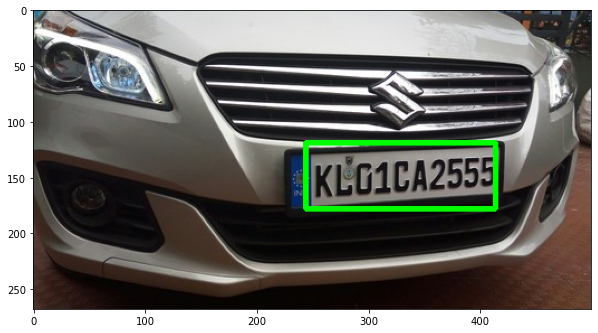

In [110]:
path = 'images/Cars147.png'
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

## Optical Character Recognition - OCR

In [111]:
!pip install pytesseract

In [112]:
import pytesseract as pt

1/1 [==============================] - 0s 112ms/step


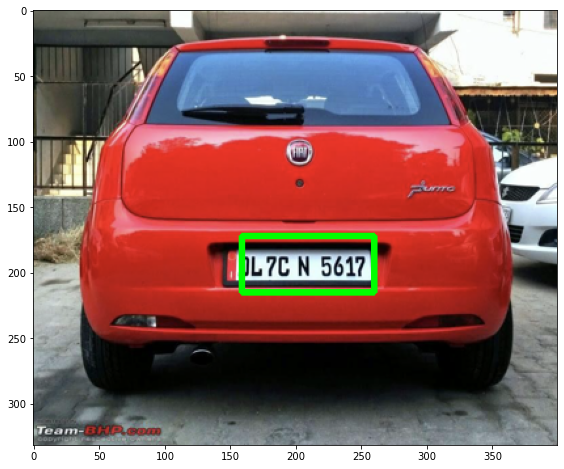

In [143]:
path = 'images/Cars159.png'
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [144]:
img = np.array(load_img(path))
xmin,xmax,ymin,ymax = cods[0]
roi = img[ymin:ymax,xmin:xmax]
# roi = cv2.resize(roi, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_CUBIC)
roi = cv2.resize(roi, None, fx=2, fy=2)
roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

kernel = np.ones((1,1), np.uint8)
#roi = cv2.dilate(roi, kernel, iterations=1)
#roi = cv2.erode(roi, kernel, iterations=1)

#roi = cv2.threshold(cv2.medianBlur(roi, 3), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]


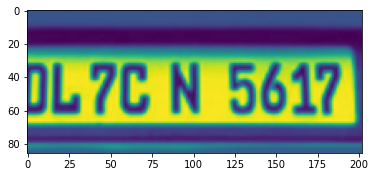

In [145]:
plt.imshow(roi)
plt.show()

In [146]:
pt.pytesseract.tesseract_cmd = 'C:\\Program Files (x86)\\Tesseract-OCR\\tesseract.exe'

In [147]:
# extract text from image
text = pt.image_to_string(roi, lang = 'eng')
text = text[:-1]
text = text.replace('\n',' ')
print(text)

L78 N 5617 
